# Regex annotation

In [26]:
import matplotlib.pyplot     as plt
import matplotlib.image      as mpimg
import numpy                 as np
import scipy.misc
import os
import pylab
import dicom
import json
import glob
import mritopng

data_filepath = "/enc_data/eddata/pacemaker/"
img_filepath = data_filepath + 'organized-data/'

## Regex + parsing

In [2]:
with open('pacemaker_words.json', 'r') as f: 
    pacemaker_words = json.load(f)

In [8]:
positive_filenames = set([])
negative_filenames = set([])

for patient_id in os.listdir(data_directory): 
    is_pacemaker = False
    
    for report_filename in os.listdir(data_directory + patient_id): 
        if not report_filename.endswith('.res') or is_pacemaker: 
            continue
        
        with open(data_directory + patient_id + '/' + report_filename, 'r') as f: 
            for row in f: 
                splitted = set(row.lower().replace('/', ' / ').split())
                
                if any([word in splitted for word in pacemaker_words]): 
                    is_pacemaker = True
                    positive_filenames.add(patient_id + "/" + report_filename)
                    break
                    
    if not is_pacemaker: 
        negative_filenames.add(patient_id)
        
with open("results/regex_ann/pos.json", 'w') as f: 
    json.dump(list(positive_filenames), f)
with open("results/regex_ann/neg.json", 'w') as f: 
    json.dump(list(negative_filenames), f)

In [9]:
print len(positive_filenames), len(negative_filenames)

2147 43875


## Evaluation

In [18]:
true_pos = set([])
predicted_pos = set([])

with open('/enc_data/eddata/clipnum_with_pacemaker.txt', 'r') as f: 
    for row in f: 
        pos = row.split('/')[0]
        if os.path.exists(data_directory + pos): 
            true_pos.add(pos)
        
with open('results/regex_ann/pos.json', 'r') as f: 
    predicted_filenames = json.load(f)
    for filename in predicted_filenames: 
        predicted_pos.add(filename.split("/")[0])
        
print np.all([ pos in predicted_pos for pos in true_pos ])

True


Sensitivity: 100%
PPV: 100%

## Convert to png 

In [36]:
with open('data/regex_ann/pos.json', 'r') as f: 
    pos_files = json.load(f)
    

for pos in pos_files:    
    prefix = pos.split('-')[0]
    
    for dicom_file in glob.glob(img_filepath + prefix + '*.dcm'): 
        if "lateral" in dicom_file.lower(): 
            continue
            
        png_filename = dicom_file.lstrip(img_filepath).strip('.dcm').replace("/", '_') + ".png"
        png_filepath = data_directory + "png/" + png_filename

        dc = dicom.read_file(dicom_file)        
        scipy.misc.imsave(png_filepath, dc.pixel_array)

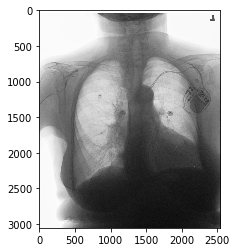

In [31]:
img = mpimg.imread("/enc_data/eddata/pacemaker/png/383543_7119581-2181-07-29-1948.png")
plt.imshow(img, cmap='Greys')
plt.show()

In [32]:
print dc.pixel_array.shape, img.shape

(3056, 2544) (3056, 2544)


next time start annotating at: `/enc_data/eddata/pacemaker/png/293612_6949180-2151-11-30-1427-ANTERO-POSTERIOR.png`